In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
#357,401,547,1026,1112,1311,1320,1418,1892

In [69]:
#load train and test
train=pd.read_csv('./CS6301-S19-MidTermProject/bb_2000s_train.csv',delimiter=',',header=0)
test=pd.read_csv('./CS6301-S19-MidTermProject/bb_2000s_test.csv',delimiter=',',header=0)

In [97]:
train_y=train.iloc[:,-1]
train_x=train.iloc[:,3:-1]


In [102]:
#train, test and validation partition
tst_frac=0.2
val_frac=0.2
X_trn, X_tst, y_trn, y_tst = train_test_split(train_x, train_y, test_size=tst_frac, 
                                                random_state=42)

  
X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac, 
                                                random_state=42)

In [98]:
test[0:4]

,PreviousHit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,1,0.663,0.821,7,-4.557,1,0.0356,0.22900,0.000,0.2950,0.849,98.001
1,0,0.408,0.943,2,-4.675,1,0.0573,0.00251,0.908,0.3430,0.131,187.526
2,0,0.657,0.929,11,-7.104,0,0.0757,0.12400,0.000,0.0932,0.885,97.862
3,0,0.356,0.646,8,-11.852,1,0.0454,0.02200,0.760,0.1080,0.147,169.956


In [99]:
train_x[0:4]

,PreviousHit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,1,0.470,0.506,9,-7.976,1,0.0308,0.490000,0.000035,0.378,0.376,165.339
1,0,0.540,0.516,1,-5.221,1,0.0246,0.266000,0.000000,0.204,0.285,135.900
2,0,0.810,0.871,4,-2.672,0,0.2410,0.130000,0.000000,0.313,0.299,87.328
3,1,0.411,0.986,8,-2.522,0,0.0583,0.000264,0.001480,0.371,0.649,165.981


In [103]:
#---------------------------------------------SVM-------------------------------------------------------------
from sklearn.svm import SVC

In [104]:
C_range = np.arange(-3.0, 6.0, 1.0)
C_values = np.power(10.0, C_range)

models = dict()
trnErr = dict()
valErr = dict()

for C in C_values:
  
    clf=SVC(C=C,kernel='rbf',gamma='scale')
    models[C]=clf.fit(X_trn,y_trn)
    valErr[C]=1-clf.score(X_val,y_val) 
    trnErr[C]=1-clf.score(X_trn,y_trn)
  

In [107]:
gamma_range = np.arange(-3.0, 3.0, 1.0)
gamma_values = np.power(10.0, gamma_range)
C_range = np.arange(-2.0, 5.0, 1.0)
C_values = np.power(10.0, C_range)

models = dict()
trnErr = dict()
valErr = dict()


print ('------------------Training errors C vs Gamma----------------------')
print ('\n')
print ('                   Gamma values                        ')
print ('\n')
print ('\t',end='')
print('\t'.join(map(str,gamma_values)))
for C in C_values:
    print (C)
    for G in gamma_values:
        clf=SVC(C=C,kernel='rbf',gamma=G)
        models[(C,G)]=clf.fit(X_trn,y_trn)
        valErr[(C,G)]=1-clf.score(X_val,y_val)
        trnErr[(C,G)]=1-clf.score(X_trn,y_trn)
        
        print ('\t'+str(np.round(trnErr[(C,G)],decimals=5)),end='')
    print ('\n')   


print ('\n\n\n')
print ('------------------Validation errors  C vs Gamma----------------------')
print ('\n')
print ('                   Gamma values                        ')
print ('\n')
print ('\t',end='')
print('\t'.join(map(str,gamma_values)))
for C in C_values:
    print (C)
    for G in gamma_values:
        print ('\t'+str(np.round(valErr[(C,G)],decimals=5)),end='')
    print ('\n') 
    
temp=min(valErr.values())
best_params=[param for param,score in valErr.items() if score==temp]

print ('\n\n\n')
print ('best set of values for C and gamma respectively are=')
print (best_params)
print ('Test error for the best C and gamma is =')
print (1-models[best_params[0]].score(X_tst,y_tst))

------------------Training errors C vs Gamma----------------------


                   Gamma values                        


	0.001	0.01	0.1	1.0	10.0	100.0
0.01
	0.38296	0.38296	0.38296	0.38296	0.38296	0.38296

0.1
	0.38296	0.38296	0.38296	0.38296	0.38296	0.38296

1.0
	0.38296	0.31762	0.18776	0.00744	0.0	0.0

10.0
	0.25393	0.21257	0.03805	0.0	0.0	0.0

100.0
	0.23739	0.14392	0.0	0.0	0.0	0.0

1000.0
	0.22994	0.07361	0.0	0.0	0.0	0.0

10000.0
	0.18776	0.02399	0.0	0.0	0.0	0.0





------------------Validation errors  C vs Gamma----------------------


                   Gamma values                        


	0.001	0.01	0.1	1.0	10.0	100.0
0.01
	0.39274	0.39274	0.39274	0.39274	0.39274	0.39274

0.1
	0.39274	0.39274	0.39274	0.39274	0.39274	0.39274

1.0
	0.39274	0.33003	0.34323	0.37954	0.39274	0.39274

10.0
	0.24422	0.25413	0.32013	0.38284	0.39274	0.39274

100.0
	0.25413	0.29043	0.36634	0.38284	0.39274	0.39274

1000.0
	0.24092	0.29373	0.36304	0.38284	0.39274	0.39274

10000.0
	0.23432	0.31683	

In [108]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier

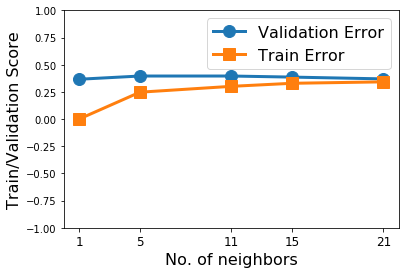

best model is one with number of neighbors=
[1]
Test error corresponding to best k is :
0.3720316622691293


In [110]:
k_list=[1,5,11,15,21]
kModels=dict()
kValErr=dict()
kTrnErr=dict()


for k in k_list:
    neigh = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
    kModels[k]=neigh.fit(X_trn,y_trn)
    kValErr[k]=1-neigh.score(X_val,y_val)
    kTrnErr[k]=1-neigh.score(X_trn,y_trn)



plt.figure()
plt.plot(kValErr.keys(), kValErr.values(), marker='o', linewidth=3, markersize=12)
plt.plot(kTrnErr.keys(), kTrnErr.values(), marker='s', linewidth=3, markersize=12)
plt.xlabel('No. of neighbors', fontsize=16)
plt.ylabel('Train/Validation Score', fontsize=16)
plt.xticks(list(kValErr.keys()), fontsize=12)
plt.legend(['Validation Error', 'Train Error'], fontsize=16)
plt.axis([0, 22, -1, 1])

plt.show()

temp=min(kValErr.values())
best_k=[param for param,score in kValErr.items() if score==temp]
print ('best model is one with number of neighbors=')
print (best_k)

print ('Test error corresponding to best k is :')
print (1-kModels[best_k[0]].score(X_tst,y_tst))

In [112]:
#random forest
from sklearn.ensemble import RandomForestClassifier

In [114]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
rfmodel=clf.fit(X_trn,y_trn)
rfTrnErr=1-clf.score(X_trn,y_trn)
rfValErr=1-clf.score(X_val,y_val)
print (rfValErr)

0.24752475247524752


In [117]:
#naive bayes
from sklearn.naive_bayes import GaussianNB

In [119]:
clf=GaussianNB()
nbmodel=clf.fit(X_trn,y_trn)
nbTrnErr=1-clf.score(X_trn,y_trn)
nbValErr=1-clf.score(X_val,y_val)
print (nbValErr)

0.35973597359735976


In [116]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [120]:
clf = LogisticRegression(random_state=0, solver='liblinear')
lrmodel=clf.fit(X_trn,y_trn)
lrTrnErr=1-clf.score(X_trn,y_trn)
lrValErr=1-clf.score(X_val,y_val)
print (lrValErr)

0.24752475247524752


In [122]:
#Boosting
from xgboost import XGBClassifier

In [123]:
clf=XGBClassifier()
xgbmodel=clf.fit(X_trn,y_trn)
xgbTrnErr=1-clf.score(X_trn,y_trn)
xgbValErr=1-clf.score(X_val,y_val)
print (xgbValErr)

0.2178217821782178
